In [3]:
import pandas as pd  # Make sure pandas is imported

# Load the dataset from the provided path
file_path = r"C:\Users\Ogbemudia\Downloads\processed_data_model_ready.csv"  # Using raw string to handle backslashes
data = pd.read_csv(file_path)

# Display the first row to check for categorical variables
print(data.head(1))


   ProductID  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
0       5874     -1.463484    -1.683711               0          -1.474937   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                        0   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                              0                            1   

   ProductCategory_Tablets  ProductBrand_HP  ProductBrand_Other Brands  \
0                        0                0                          1   

   ProductBrand_Samsung  ProductBrand_Sony  
0                     0                  0  


In [4]:
# Check for missing values
data.isnull().sum()


ProductID                        0
ProductPrice                     0
CustomerAge                      0
CustomerGender                   0
PurchaseFrequency                0
CustomerSatisfaction             0
PurchaseIntent                   0
ProductCategory_Laptops          0
ProductCategory_Smart Watches    0
ProductCategory_Smartphones      0
ProductCategory_Tablets          0
ProductBrand_HP                  0
ProductBrand_Other Brands        0
ProductBrand_Samsung             0
ProductBrand_Sony                0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Show the missing values in each column
print(missing_values)


ProductID                        0
ProductPrice                     0
CustomerAge                      0
CustomerGender                   0
PurchaseFrequency                0
CustomerSatisfaction             0
PurchaseIntent                   0
ProductCategory_Laptops          0
ProductCategory_Smart Watches    0
ProductCategory_Smartphones      0
ProductCategory_Tablets          0
ProductBrand_HP                  0
ProductBrand_Other Brands        0
ProductBrand_Samsung             0
ProductBrand_Sony                0
dtype: int64


In [7]:
# Impute missing numerical values with the mean
data.fillna(data.mean(), inplace=True)

# Drop rows with any missing values
# data.dropna(inplace=True)


In [8]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

# Remove duplicate rows if any
data = data.drop_duplicates()


Duplicate rows: 0


In [9]:
# Check data types of each column
print(data.dtypes)


ProductID                          int64
ProductPrice                     float64
CustomerAge                      float64
CustomerGender                     int64
PurchaseFrequency                float64
CustomerSatisfaction               int64
PurchaseIntent                     int64
ProductCategory_Laptops            int64
ProductCategory_Smart Watches      int64
ProductCategory_Smartphones        int64
ProductCategory_Tablets            int64
ProductBrand_HP                    int64
ProductBrand_Other Brands          int64
ProductBrand_Samsung               int64
ProductBrand_Sony                  int64
dtype: object


In [10]:
# Convert 'CustomerAge' to numeric if it's in the wrong format
data['CustomerAge'] = pd.to_numeric(data['CustomerAge'], errors='coerce')


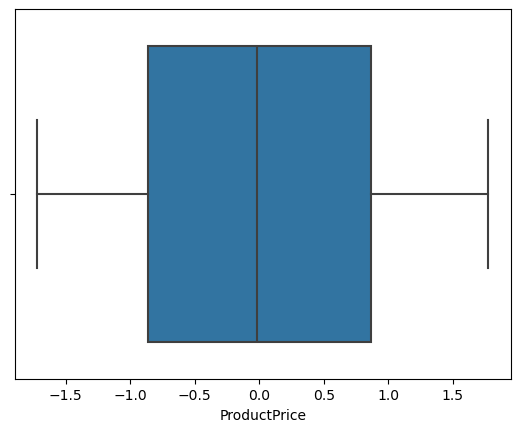

In [11]:
# Use box plots to detect outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for one of the numeric columns (e.g., 'ProductPrice')
sns.boxplot(x=data['ProductPrice'])
plt.show()


In [16]:
import numpy as np  # Import numpy to handle numerical operations
from scipy import stats  # Import stats from scipy for Z-score calculations

# Remove rows where the Z-score is above a threshold (e.g., 3 standard deviations)
data = data[(np.abs(stats.zscore(data['ProductPrice'])) < 3)]


In [13]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns
numeric_columns = ['ProductPrice', 'CustomerAge', 'PurchaseFrequency', 'CustomerSatisfaction']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


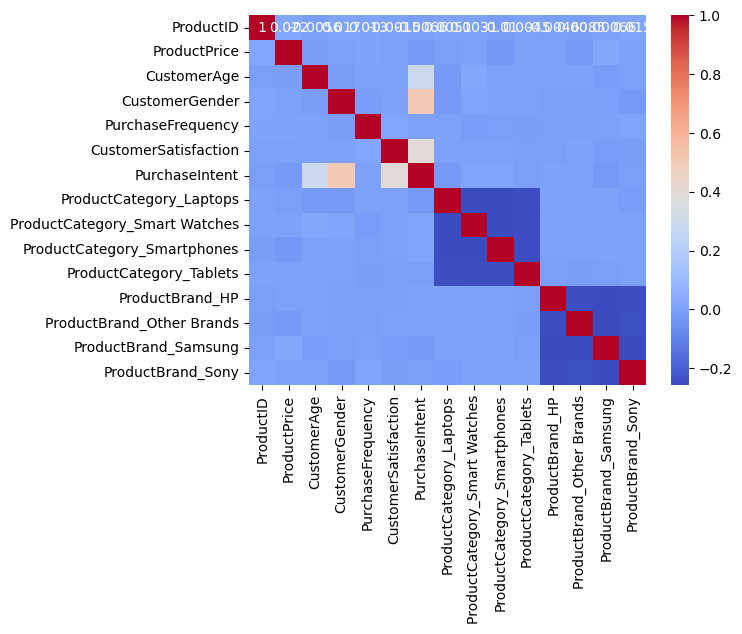

In [14]:
# Check correlation matrix
correlation_matrix = data.corr()

# Use heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [17]:
# Assuming your target variable is 'PurchaseIntent', replace 'target_column' with the actual name.
print(data['PurchaseIntent'].value_counts())


PurchaseIntent
1    5098
0    3902
Name: count, dtype: int64


In [18]:
# Display all the column names in the dataset
print(data.columns)


Index(['ProductID', 'ProductPrice', 'CustomerAge', 'CustomerGender',
       'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent',
       'ProductCategory_Laptops', 'ProductCategory_Smart Watches',
       'ProductCategory_Smartphones', 'ProductCategory_Tablets',
       'ProductBrand_HP', 'ProductBrand_Other Brands', 'ProductBrand_Samsung',
       'ProductBrand_Sony'],
      dtype='object')


# Step 1: Define the Problem and Objective
Objective: Identify the goal of your model. Is it a classification problem (e.g., predict whether a customer will make a purchase) or a regression problem (e.g., predict the exact value of future sales)?

# Step 2: Data Preprocessing
Check for Missing Data:

Review and handle any missing values (e.g., through imputation or removal).

In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Ogbemudia\Downloads\processed_data_model_ready.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm it's loaded correctly
print(data.head())


   ProductID  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
0       5874     -1.463484    -1.683711               0          -1.474937   
1       5875     -0.659199    -0.554461               1          -0.559358   
2       5876      1.300576     1.305479               0          -1.658053   
3       5877     -0.791745     1.305479               1          -0.010010   
4       5878      0.327198     0.906920               0           1.271800   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                        0   
1                     2               1                        0   
2                     5               1                        0   
3                     3               1                        0   
4                     3               0                        0   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                              0                         

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


ProductID                        0
ProductPrice                     0
CustomerAge                      0
CustomerGender                   0
PurchaseFrequency                0
CustomerSatisfaction             0
PurchaseIntent                   0
ProductCategory_Laptops          0
ProductCategory_Smart Watches    0
ProductCategory_Smartphones      0
ProductCategory_Tablets          0
ProductBrand_HP                  0
ProductBrand_Other Brands        0
ProductBrand_Samsung             0
ProductBrand_Sony                0
dtype: int64


# Step 3: Remove Duplicates
After checking for missing values, you can remove any duplicate entries:

In [4]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


In [5]:
# Step 4: Handle Outliers

In [6]:
from scipy import stats
import numpy as np

# Remove outliers based on Z-score
data = data[(np.abs(stats.zscore(data['ProductPrice'])) < 3)]


# Step 5: Verify Data Preparation
After cleaning the data, it's a good practice to verify that the dataset is ready for analysis.

In [7]:
# Display the shape of the dataset and check the first few rows again
print(data.shape)
print(data.head())


(9000, 15)
   ProductID  ProductPrice  CustomerAge  CustomerGender  PurchaseFrequency  \
0       5874     -1.463484    -1.683711               0          -1.474937   
1       5875     -0.659199    -0.554461               1          -0.559358   
2       5876      1.300576     1.305479               0          -1.658053   
3       5877     -0.791745     1.305479               1          -0.010010   
4       5878      0.327198     0.906920               0           1.271800   

   CustomerSatisfaction  PurchaseIntent  ProductCategory_Laptops  \
0                     1               0                        0   
1                     2               1                        0   
2                     5               1                        0   
3                     3               1                        0   
4                     3               0                        0   

   ProductCategory_Smart Watches  ProductCategory_Smartphones  \
0                              0              

# Build and train the business analytics model using the data.

# Step 1: Import Required Libraries

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import classification_report, accuracy_score


# Step 2: Load the Data

In [9]:
# Load the dataset
file_path = r"C:\Users\Ogbemudia\Downloads\processed_data_model_ready.csv"
data = pd.read_csv(file_path)


# Step 3: Define Target Variable and Features

In [10]:
# Define features and target variable
X = data.drop('PurchaseIntent', axis=1)  # Features
y = data['PurchaseIntent']  # Target


# Step 4: Split the Data

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Choose and Train the Model

In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 6: Evaluate the Model
After training, evaluate the model's performance using the test set

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       793
           1       0.96      0.96      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



# Step 7: Interpretation of Results
Accuracy: A value close to 1 indicates a well-performing model.
Classification Report: This provides detailed metrics, including precision, recall, and F1-score for each class.

# : Evaluate the model's performance using relevant metrics.

# Step 1: Import Required Libraries

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Make Predictions
You already have the predictions from the model

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)


# Step 3: Calculation of Relevant Metrics:
Accuracy: The proportion of correctly classified instances.

Confusion Matrix: A matrix that shows the true positives, false positives, true negatives, and false negatives.

Classification Report: Includes precision, recall, F1-score, and support for each class.

ROC-AUC Score: A single scalar value that captures the performance of the model across all thresholds.

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate ROC-AUC score (assuming binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')


Accuracy: 0.95
Confusion Matrix:
[[751  42]
 [ 40 967]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       793
           1       0.96      0.96      0.96      1007

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

ROC-AUC Score: 1.00


In [18]:
# Step 4: Visualize the Confusion Matrix for better insights

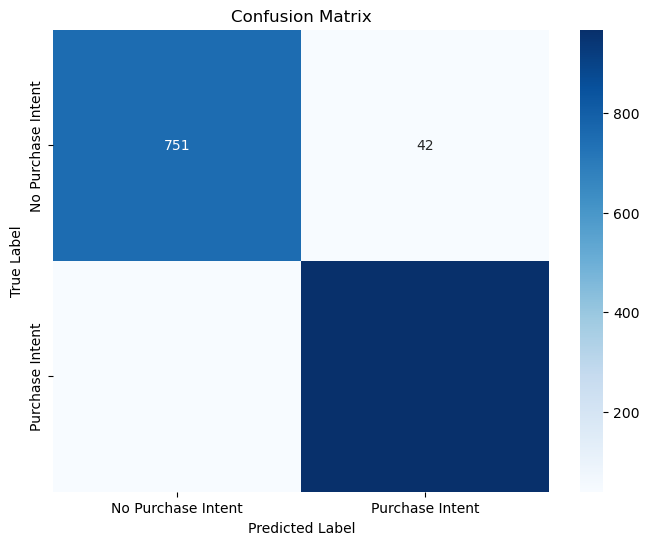

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Purchase Intent', 'Purchase Intent'],
            yticklabels=['No Purchase Intent', 'Purchase Intent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [20]:
# Step 5: ROC Curve

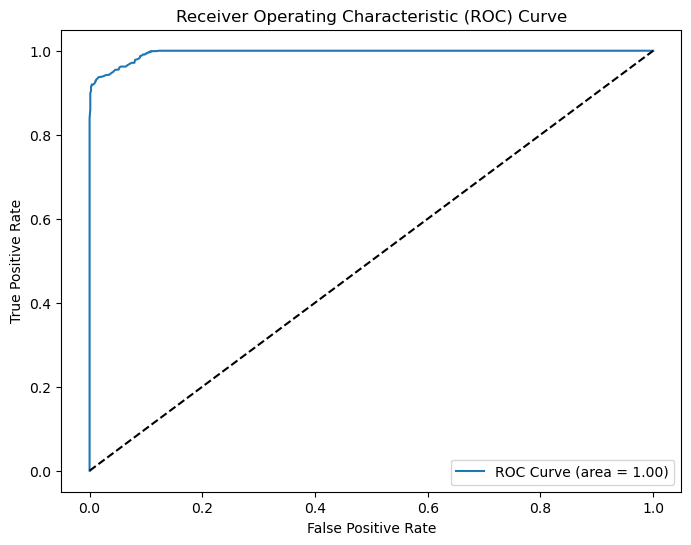

In [21]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Summary of Metrics
Accuracy gives a quick overview of the model’s performance.
Confusion Matrix shows how well the model is distinguishing between classes.
Classification Report provides detailed performance metrics for each class.
ROC-AUC Score helps assess the model's performance over different thresholds and indicates how well the model separates classes.